In [64]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import os
from datetime import datetime, timedelta
from rakott.mpl import savefig_bbox

def int_to_dt(t):
    return pd.to_datetime(start_date) + timedelta(days=t)

In [2]:
url = 'https://github.com/ImperialCollegeLondon/covid19model/raw/v1.0/data/COVID-19-up-to-date.csv'
fname = '../data/COVID-19-up-to-date.csv'
if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
df = pd.read_csv(fname, encoding='iso-8859-1')
df['date'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')

In [54]:
France_df = df[df['countriesAndTerritories'] == 'France'].copy()
France_N = df.iloc[0]['popData2018']
France_df['fraction'] = France_df['cases'] / France_N

Spain_df = df[df['countriesAndTerritories'] == 'Spain'].copy()
Spain_N = df.iloc[0]['popData2018']
Spain_df['fraction'] = Spain_df['cases'] / Spain_N

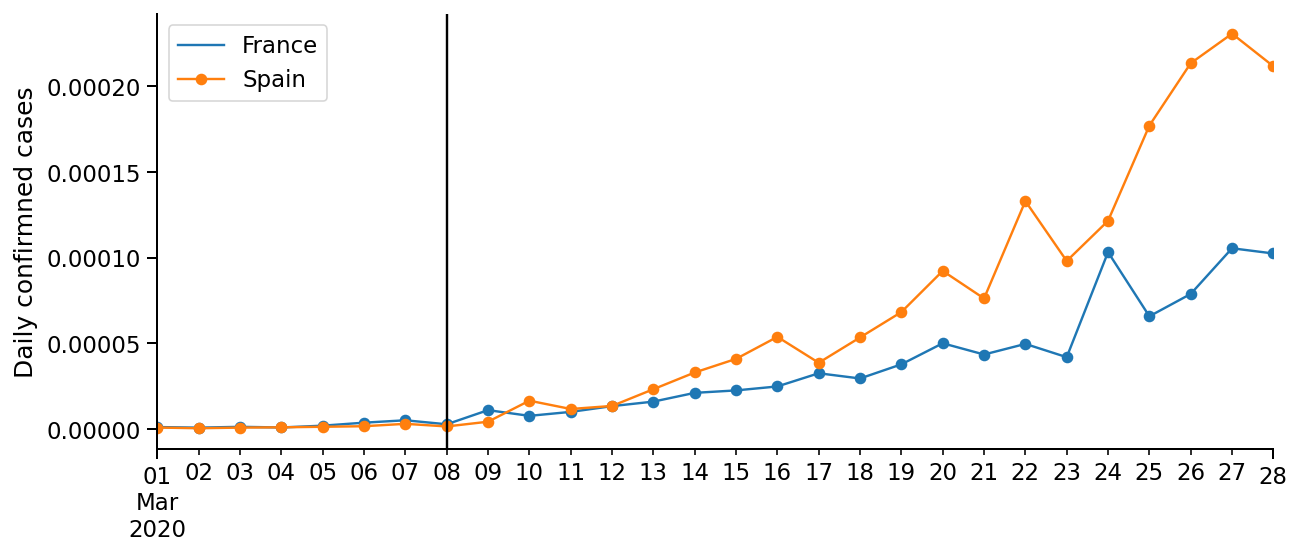

In [67]:
fig, ax = plt.subplots(figsize=(10, 4))
France_df.plot('date', 'fraction', marker='o', ax=ax, label='France')
Spain_df.plot('date', 'fraction', marker='o', ax=ax, label='Spain')
ax.set_xlim(pd.to_datetime('2020-3-1'), None)
ax.set_ylabel('Daily confirmned cases')
ax.set_xlabel('')
ax.axvline(pd.to_datetime('2020-03-8'), color='k')
txt = ax.get_xticklabels()
sns.despine()
fig.savefig('../figures/Fig-fr-vs-es.pdf', **savefig_bbox(*txt))